<a id='top'></a>

In [1]:
%load_ext watermark
%watermark -a 'Author: James Bourbeau' -u -d -v -p numpy,matplotlib,sklearn,mlxtend

Author: James Bourbeau 
last updated: 2017-03-18 

CPython 3.6.0
IPython 5.1.0

numpy 1.12.0
matplotlib 2.0.0
sklearn 0.18.1
mlxtend 0.5.1


# X-meeting machine learning example
### Table of contents
1. [Import the iris dataset](#Import-the-iris-dataset)
2. [Random forest classification](#Random-forest-classification)
3. [Hyperparameter tuning](#Hyperparameter-tuning)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
from mlxtend.plotting import category_scatter, plot_decision_regions

%matplotlib inline

## Import the iris dataset
(we'll only look at the first two training features for visualization purposes)

[ [back to top](#top) ]

The [iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris) is a classic classification dataset&mdash;it appears in many textbooks and tutorials. It consists of 150 samples of iris flower measurements made on three different types of irises (Setosa, Versicolour, and Virginica). Each sample has four features: sepal length (cm), sepal width (cm), petal length (cm), and petal width (cm). In the following example, the iris classes have be codified such that Setosa=0, Versicolor=1, Virginica=2.

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

Let's get a look at what are dataset look like by making a scatter plot

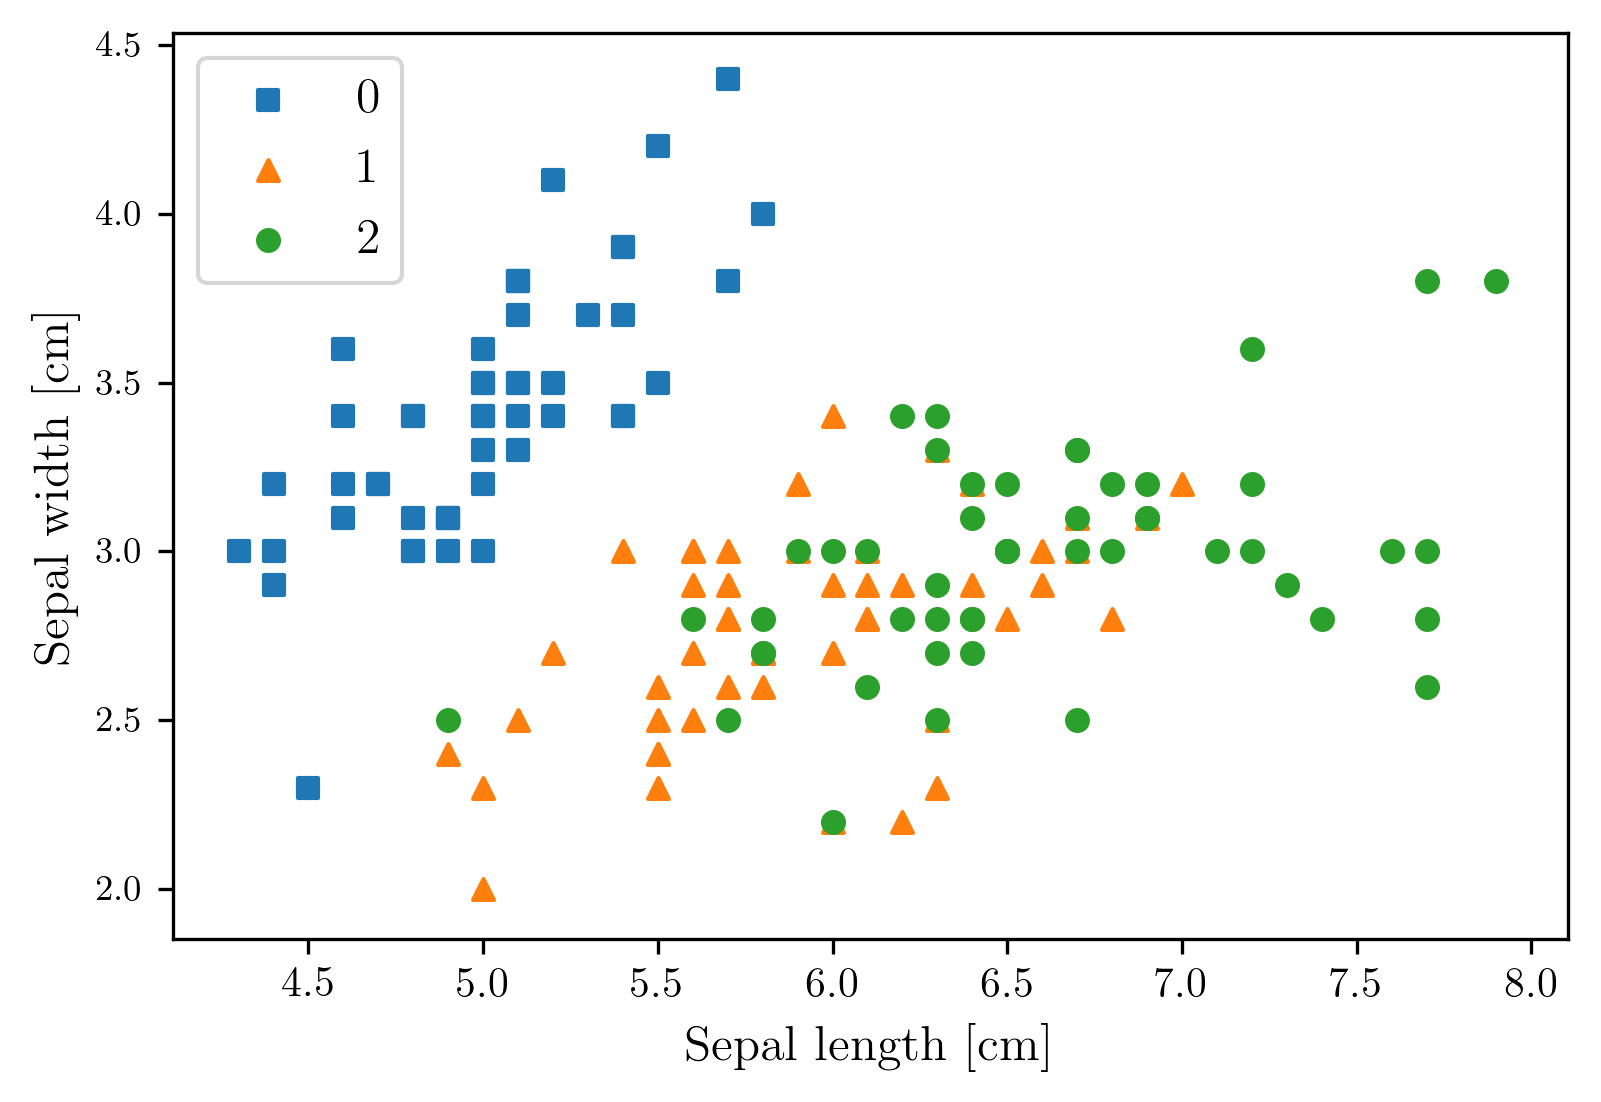

In [4]:
fig, ax = plt.subplots()
for label, color, marker in zip([0, 1, 2], ['C0', 'C1', 'C2'], ['s', '^', 'o']):
    label_mask = y == label
    ax.scatter(X[label_mask,0], X[label_mask,1], color=color, marker=marker, label=label)
ax.set_xlabel('Sepal length [cm]')
ax.set_ylabel('Sepal width [cm]')
ax.legend()
plt.show()

As we can see, the 0 class is linearly seperable from the 1 and 2 classes.

Split dataset into separate testing and training sets 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

## Random forest classification
[ [back to top](#top) ]

In [6]:
rf = RandomForestClassifier(random_state=2)

In [7]:
rf = rf.fit(X_train, y_train)
train_pred = rf.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
test_pred = rf.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print(f'Testing accuracy: {test_acc:0.2%}')
print(f'Training accuracy: {train_acc:0.2%}')

Testing accuracy: 77.78%
Training accuracy: 91.43%


The classifier has a much higher classification accuracy on the training set than it does on the testing set. This is because the default hyperparameters are such that the random forest is overfitting the testing data.

Let's take a look at the 2-dimensional decision regions.

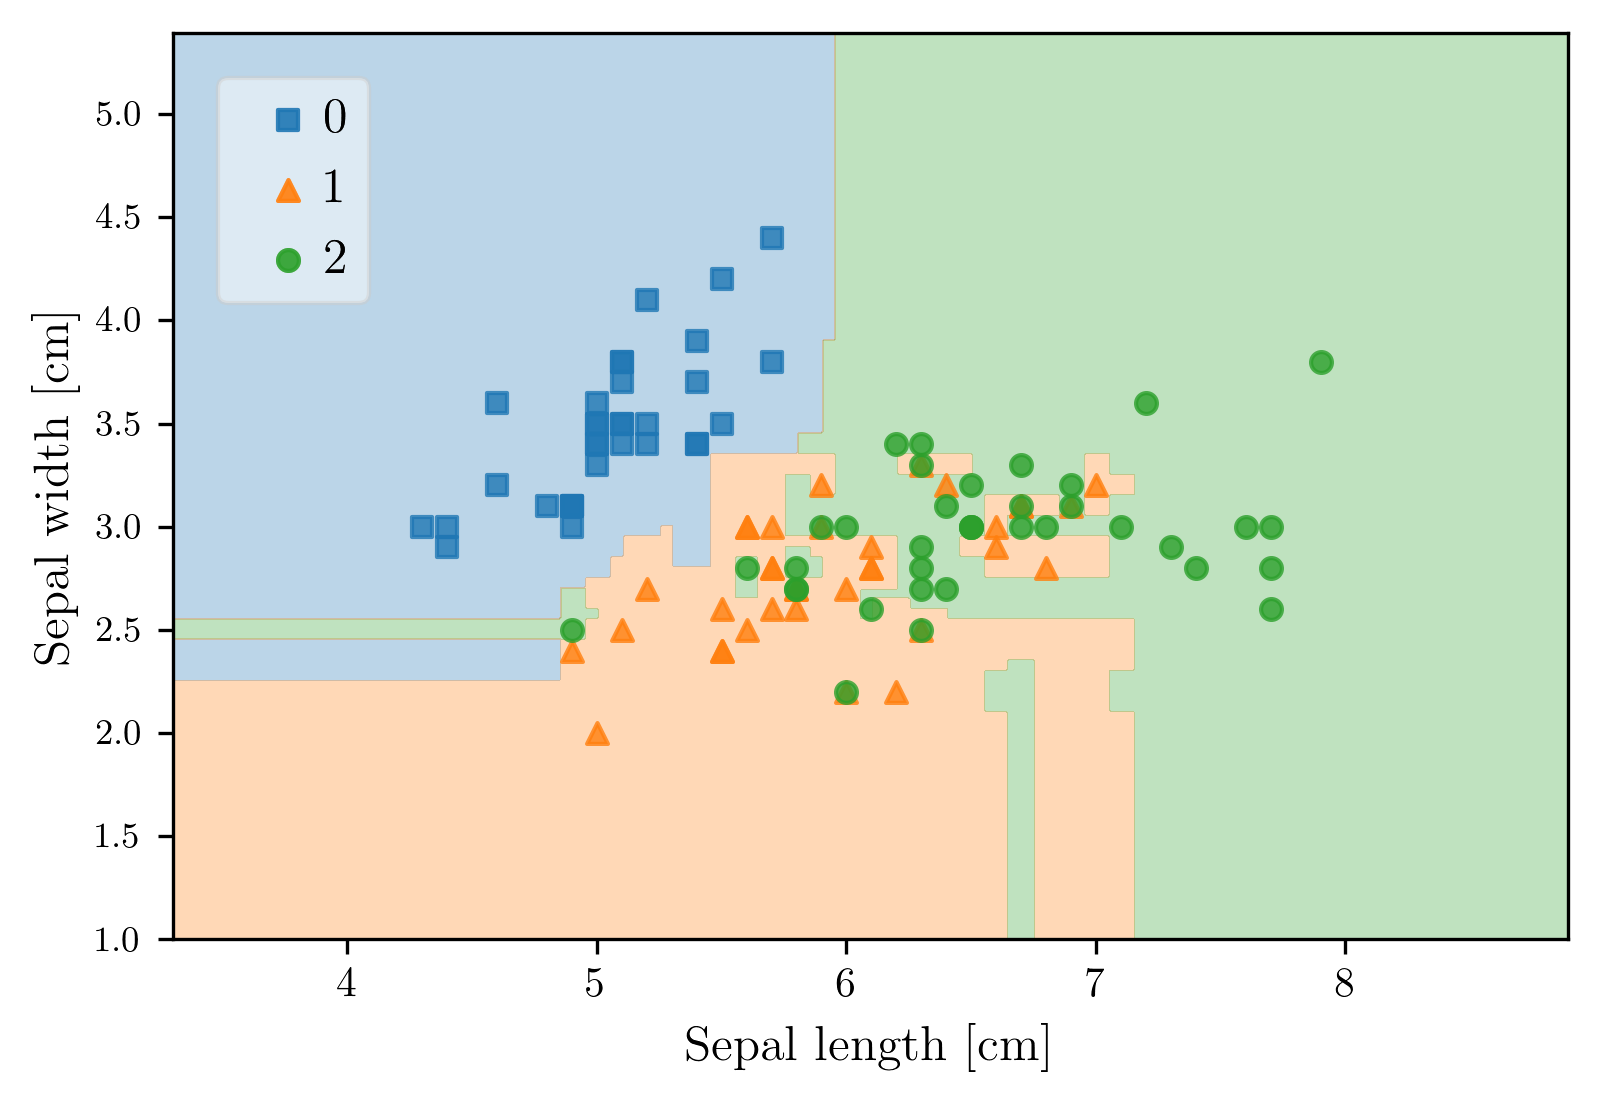

In [8]:
fig, ax = plt.subplots()
plot_decision_regions(X_train, y_train, clf=rf, res=0.01, legend=2, colors='C0,C1,C2', hide_spines=False, ax=ax)
ax.set_xlabel('Sepal length [cm]')
ax.set_ylabel('Sepal width [cm]')
plt.show()

## Hyperparameter tuning
[ [back to top](#top) ]

In [9]:
max_depth_range = np.arange(1, 10)
train_scores, test_scores = validation_curve(rf, X_train, y_train,
                                param_name='max_depth', param_range=max_depth_range, cv=3,
                                scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

Plot the corresponding validation curve for the maximum tree depth

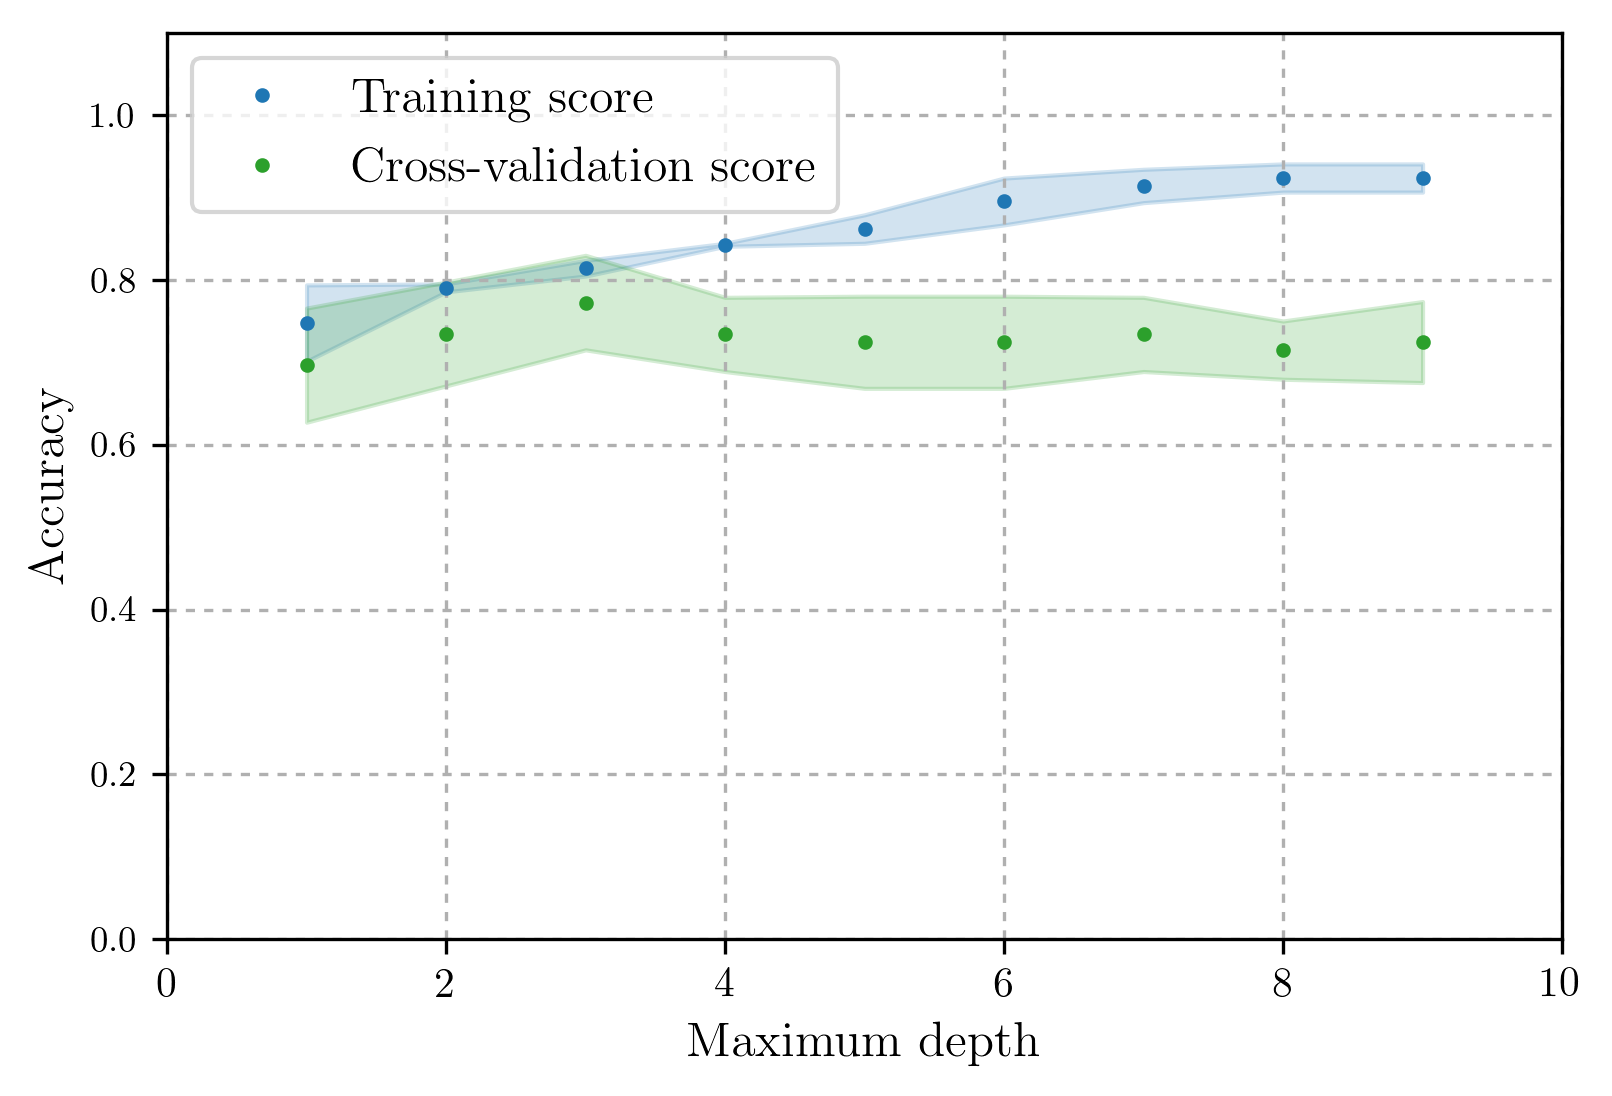

In [10]:
fig, ax = plt.subplots()

ax.plot(max_depth_range, train_scores_mean, label="Training score",
             color='C0')
ax.fill_between(max_depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color='C0')
ax.plot(max_depth_range, test_scores_mean, label="Cross-validation score",
             color='C2')
ax.fill_between(max_depth_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color='C2')
ax.set_xlabel('Maximum depth')
ax.set_ylabel('Accuracy')
ax.set_xlim(max_depth_range.min()-1, max_depth_range.max()+1)
ax.set_ylim(0.0, 1.1)
ax.grid()
ax.legend()
plt.show()

In [11]:
rf = rf.set_params(max_depth=3)

In [12]:
rf = rf.fit(X_train, y_train)
train_pred = rf.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
test_pred = rf.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print(f'Testing accuracy: {test_acc:0.2%}')
print(f'Training accuracy: {train_acc:0.2%}')

Testing accuracy: 75.56%
Training accuracy: 80.95%


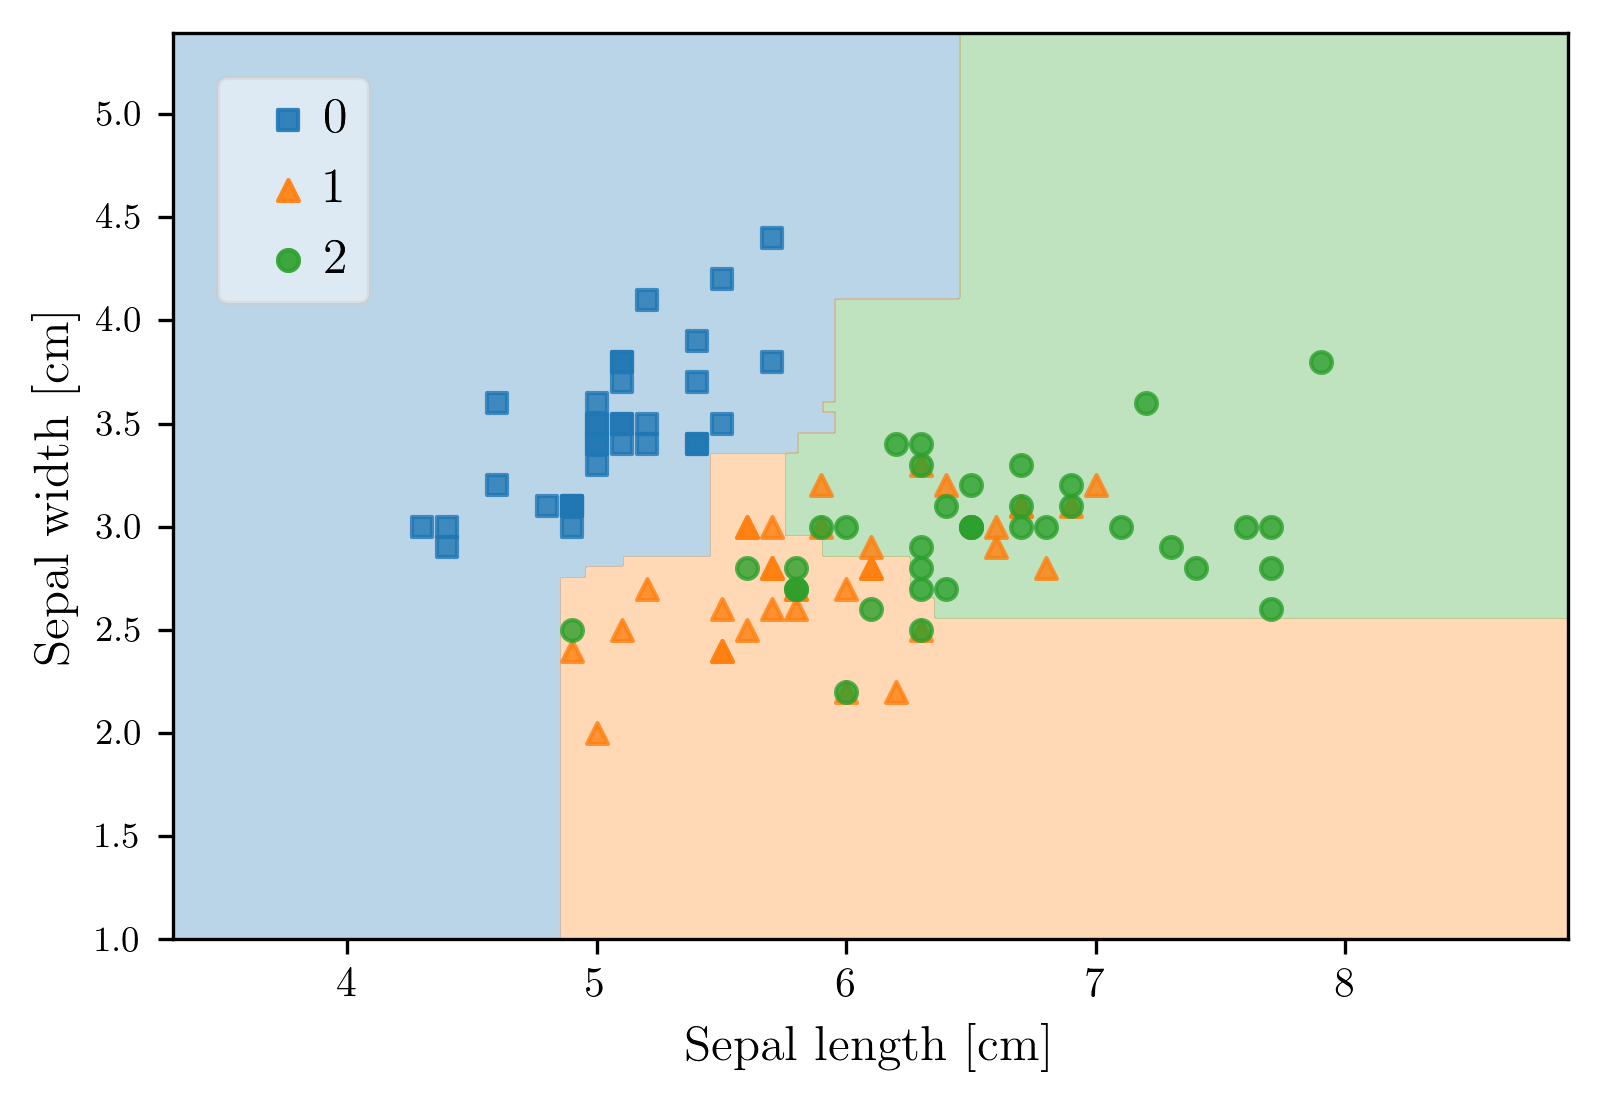

In [13]:
fig, ax = plt.subplots()
plot_decision_regions(X_train, y_train, clf=rf, res=0.01, legend=2, colors='C0,C1,C2', hide_spines=False, ax=ax)
ax.set_xlabel('Sepal length [cm]')
ax.set_ylabel('Sepal width [cm]')
plt.show()